Um exemplo simples em Python que demonstra como um único neurônio pode aprender. O código vai incluir:

1. Um dataset fictício.

2. A possibilidade de escolher entre diferentes funções de ativação (Sigmóide, ReLU e Tangente Hiperbólica).

3. Um loop de treinamento onde o neurônio ajusta seus pesos para minimizar o erro.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Derivadas das funções de ativação (para o gradiente)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [21]:


# Dataset fictício (problema de classificação binária)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Entradas
y = np.array([[0], [1], [1], [1]])              # Saídas esperadas (OR)

# Hiperparâmetros
learning_rate = 0.05
epochs = 473000

# Inicialização dos pesos e viés
np.random.seed(42)
weights = np.random.randn(2, 1)
bias = np.random.randn()

# Escolha da função de ativação
activation_function = sigmoid
activation_derivative = sigmoid_derivative

# Treinamento do neurônio
errors = []
for epoch in range(epochs):
    # Forward pass
    weighted_sum = np.dot(X, weights) + bias
    output = activation_function(weighted_sum)

    # Cálculo do erro (erro quadrático médio)
    error = y - output
    errors.append(np.mean(np.square(error)))

    # Backpropagation (ajuste dos pesos e viés)
    d_error = -2 * error / len(X)  # Derivada do erro quadrático
    d_output = activation_derivative(weighted_sum)
    gradient = d_error * d_output

    weights -= learning_rate * np.dot(X.T, gradient)
    bias -= learning_rate * np.sum(gradient)

    # Exibir progresso a cada 1000 épocas
    if epoch % 1000 == 0:
        print(f"Época {epoch}, Erro: {errors[-1]}")


Época 0, Erro: 0.17546525262263657
Época 1000, Erro: 0.07152962121241238
Época 2000, Erro: 0.039473458124325185
Época 3000, Erro: 0.025846142161248645
Época 4000, Erro: 0.018734837569662263
Época 5000, Erro: 0.01449572131515371
Época 6000, Erro: 0.011727205499246834
Época 7000, Erro: 0.009796625288945697
Época 8000, Erro: 0.008382845961053204
Época 9000, Erro: 0.00730771105729081
Época 10000, Erro: 0.006465302159781511
Época 11000, Erro: 0.005789074789620553
Época 12000, Erro: 0.005235300108021518
Época 13000, Erro: 0.004774152190655284
Época 14000, Erro: 0.0043846406088860704
Época 15000, Erro: 0.0040515935016023205
Época 16000, Erro: 0.003763789536453046
Época 17000, Erro: 0.0035127614638097693
Época 18000, Erro: 0.0032920069263624933
Época 19000, Erro: 0.003096454274509011
Época 20000, Erro: 0.0029220926290954045
Época 21000, Erro: 0.0027657104198534586
Época 22000, Erro: 0.0026247071879775406
Época 23000, Erro: 0.002496955876879224
Época 24000, Erro: 0.002380700553929391
Época 2500

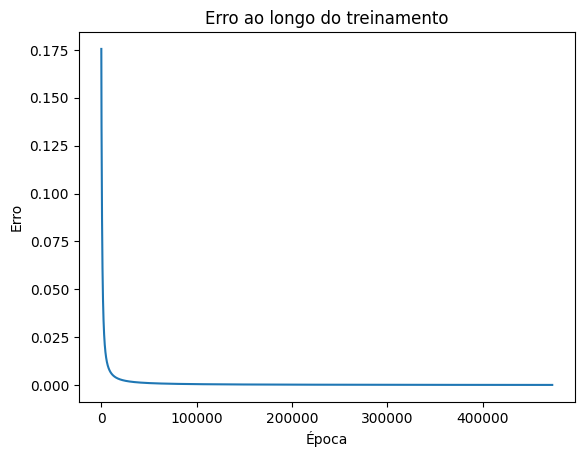


Teste do neurônio treinado:
Entrada: [0 0], Saída esperada: [0], Saída do neurônio: [0.01493955]
Entrada: [0 1], Saída esperada: [1], Saída do neurônio: [0.99058196]
Entrada: [1 0], Saída esperada: [1], Saída do neurônio: [0.99058196]
Entrada: [1 1], Saída esperada: [1], Saída do neurônio: [0.99999863]


In [22]:
# Plot do erro ao longo do treinamento
plt.plot(range(epochs), errors)
plt.title("Erro ao longo do treinamento")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.show()

# Teste do neurônio treinado
print("\nTeste do neurônio treinado:")
for i in range(len(X)):
    weighted_sum = np.dot(X[i], weights) + bias
    output = activation_function(weighted_sum)
    print(f"Entrada: {X[i]}, Saída esperada: {y[i]}, Saída do neurônio: {output}")